# Insights for investing in a cab company
---

In [26]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from pywaffle import Waffle

%matplotlib inline

### Cab dataset

In [33]:
# Create dataframe from Cab_Data.csv dataset
cab_df = pd.read_csv('..\data\Cab_Data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [34]:
# Dataframe info
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [35]:
# Summary statistics
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [41]:
# Find null values in cab_df
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### City dataset

In [36]:
# Create dataframe from City.csv dataset
city_df = pd.read_csv('..\data\City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [37]:
# Dataframe info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [38]:
# Summary statistics
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SAN FRANCISCO CA,"959,307","12,421"
freq,1,1,1


In [39]:
# Convert population and users columns of city_df to integer datatype
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


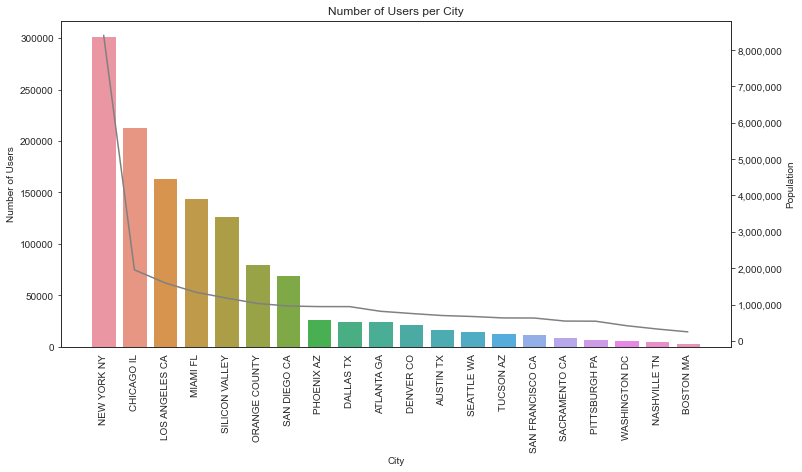

In [40]:
# Plot the number of users
plt.figure(figsize=(12, 6))
sb.barplot(x='City', y='Users', data=city_df.sort_values('Users', ascending=False))
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Number of Users per City')
plt.xticks(rotation=90)

# Plot population
ax2 = plt.twinx()
sb.lineplot(x='City', y='Population', data=city_df, sort=False, color='grey', ax=ax2)
ax2.set_ylabel('Population')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 

plt.show()